<a href="https://colab.research.google.com/github/HaniRawat/ML-Lab/blob/main/ml_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Result-Experiment.xlsx')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,ML Lab,Unnamed: 6,Unnamed: 7,Unnamed: 8,Project Phase 1,Unnamed: 10,Unnamed: 11
0,S. No.,Internal,External,Total,Grde,Internal,External,Total,Grde,External,Total,Grde
1,1,37,36,73,F,25.5,28,53.5,C,36,36,B+
2,2,61,75,136,B+,30.5,38,68.5,B+,41,41,A
3,3,50,48,98,C,27,32,59,B,37,37,B+
4,4,57,48,105,C,33,38,71,B+,37,37,B+
...,...,...,...,...,...,...,...,...,...,...,...,...
57,57,57,33,90,C,29.5,34,63.5,B,32,32,B
58,58,34,AB,34,AB,23.5,29,52.5,C,35,35,B+
59,59,46,32,78,F,22.5,32,54.5,C,35,35,B+
60,60,51,31,82,P,29,30,59,B,28,28,B


In [4]:
df_cleaned = df.iloc[1:, [5, 6]].copy()  # Selecting 'Internal' and 'External' under 'ML Lab'
df_cleaned.columns = ["Internal", "External"]  # Renaming columns

# Convert to numeric values
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

# Drop any rows with missing values
df_cleaned = df_cleaned.dropna()

# Compute means of Internal and External marks
mean_internal = df_cleaned["Internal"].mean()
mean_external = df_cleaned["External"].mean()

# Compute numerator and denominator for slope (m)
numerator = ((df_cleaned["Internal"] - mean_internal) * (df_cleaned["External"] - mean_external)).sum()
denominator = ((df_cleaned["Internal"] - mean_internal) ** 2).sum()

# Compute slope (m)
m = numerator / denominator

# Compute intercept (b)
b = mean_external - (m * mean_internal)

# Predict External marks using the regression equation
df_cleaned["Predicted External"] = (m * df_cleaned["Internal"]) + b

# Compute Mean Squared Error (MSE)
mse = ((df_cleaned["External"] - df_cleaned["Predicted External"]) ** 2).mean()

# Print results
print(f"Linear Regression Equation: Y = {m:.4f} * X + {b:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Display first few predictions
print(df_cleaned.head())

Linear Regression Equation: Y = 0.2802 * X + 25.2648
Mean Squared Error (MSE): 8.9170
   Internal  External  Predicted External
1      25.5      28.0           32.410006
2      30.5      38.0           33.811032
3      27.0      32.0           32.830314
4      33.0      38.0           34.511546
5      41.0      40.0           36.753187


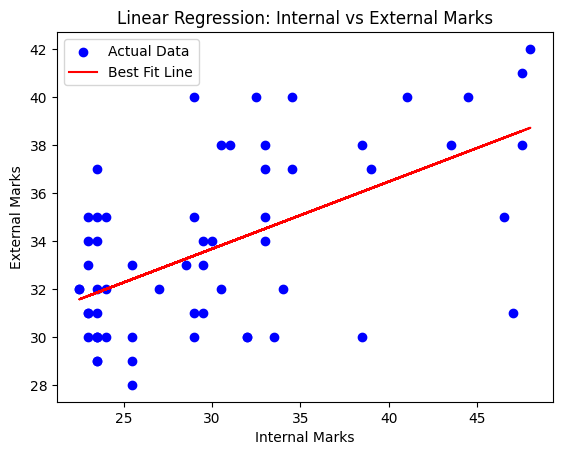

In [6]:
# Scatter plot of actual data points
plt.scatter(df_cleaned["Internal"], df_cleaned["External"], color="blue", label="Actual Data")

# Plot the best fit line
plt.plot(df_cleaned["Internal"], df_cleaned["Predicted External"], color="red", label="Best Fit Line")

# Labels and title
plt.xlabel("Internal Marks")
plt.ylabel("External Marks")
plt.title("Linear Regression: Internal vs External Marks")
plt.legend()
plt.show()